In [1]:
import pandas as pd

In [2]:
diabetes=pd.read_csv("diabetes.csv")
diabetes.head()

PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0    1354778            0            171                      80   
1    1147438            8             92                      93   
2    1640031            7            115                      47   
3    1883350            9            103                      78   
4    1424119            1             85                      59   

   TricepsThickness  SerumInsulin        BMI  DiabetesPedigree  Age  Diabetic  
0                34            23  43.509726          1.213191   21         0  
1                47            36  21.240576          0.158365   23         0  
2                52            35  41.511523          0.079019   23         0  
3                25           304  29.582192          1.282870   43         1  
4                27            35  42.604536          0.549542   22         0

In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


In [4]:
diabetes.shape

(15000, 10)

In [5]:
features = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']
label='Diabetic'
X,y=diabetes[features],diabetes[label]

for n in range(0,4):
    print("Patient",str(n+1), " Features:", X.loc[n], " Label:", y.loc[n])

Patient 1  Features: Pregnancies                 0.000000
PlasmaGlucose             171.000000
DiastolicBloodPressure     80.000000
TricepsThickness           34.000000
SerumInsulin               23.000000
BMI                        43.509726
DiabetesPedigree            1.213191
Age                        21.000000
Name: 0, dtype: float64  Label: 0
Patient 2  Features: Pregnancies                8.000000
PlasmaGlucose             92.000000
DiastolicBloodPressure    93.000000
TricepsThickness          47.000000
SerumInsulin              36.000000
BMI                       21.240576
DiabetesPedigree           0.158365
Age                       23.000000
Name: 1, dtype: float64  Label: 0
Patient 3  Features: Pregnancies                 7.000000
PlasmaGlucose             115.000000
DiastolicBloodPressure     47.000000
TricepsThickness           52.000000
SerumInsulin               35.000000
BMI                        41.511523
DiabetesPedigree            0.079019
Age                       

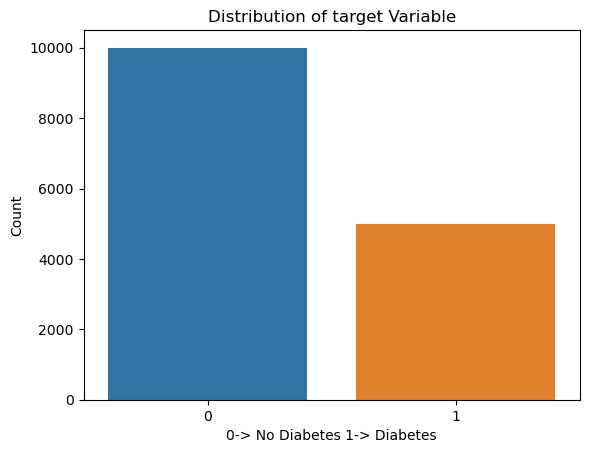

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Diabetic', data=diabetes)
plt.xlabel('0-> No Diabetes 1-> Diabetes')
plt.ylabel('Count')
plt.title('Distribution of target Variable') 
plt.show()

In [7]:
diabetes["Diabetic"].value_counts("%")*100

0    66.666667
1    33.333333
Name: Diabetic, dtype: float64

In [8]:
diabetes.groupby('Diabetic').describe()

PatientID                                                      \
             count          mean            std        min         25%   
Diabetic                                                                 
0          10000.0  1.505477e+06  288505.318777  1000038.0  1255712.25   
1           5000.0  1.497811e+06  290705.456782  1000326.0  1245424.75   

                                           Pregnancies          ...  \
                50%         75%        max       count    mean  ...   
Diabetic                                                        ...   
0         1512402.5  1754929.25  1999997.0     10000.0  2.2479  ...   
1         1494162.5  1755907.00  1999836.0      5000.0  5.1778  ...   

         DiabetesPedigree                Age                                  \
                      75%       max    count     mean        std   min   25%   
Diabetic                                                                       
0                0.521379  2.215815  10000.0  27.2090   9.928463  21.0  22.0   
1                0.774823  2.301594   5000.0  35.9952  13.780332  21.0  22.0   

                            
           50%   75%   max  
Diabetic                    
0         24.0  26.0  77.0  
1         37.0  46.0  67.0  

[2 rows x 72 columns]

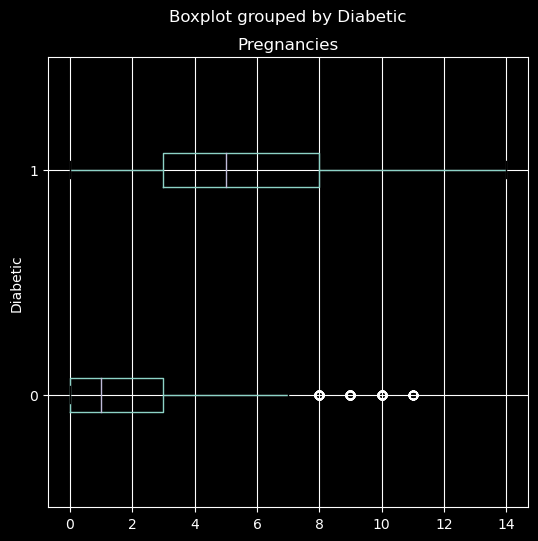

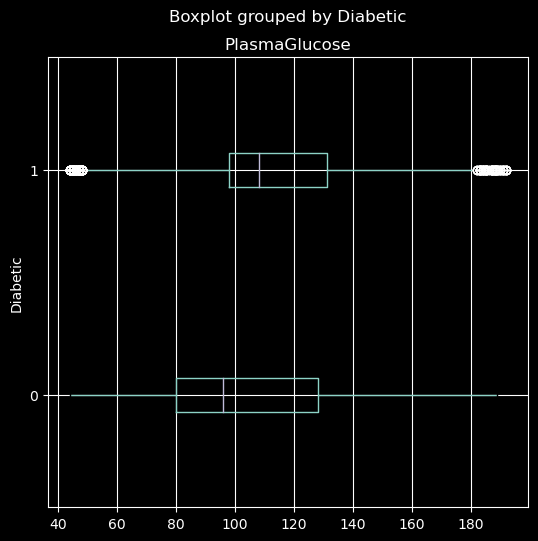

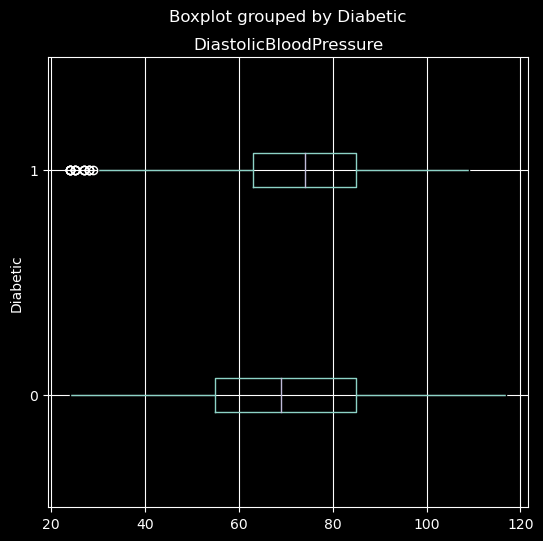

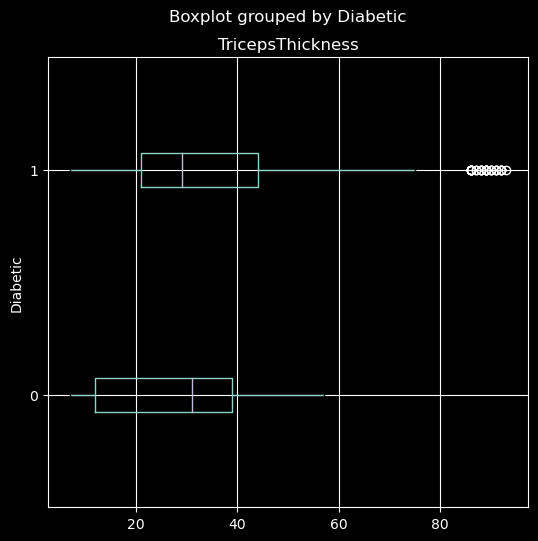

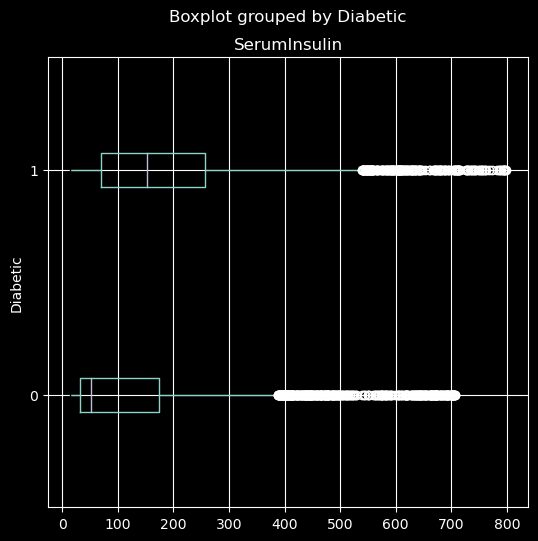

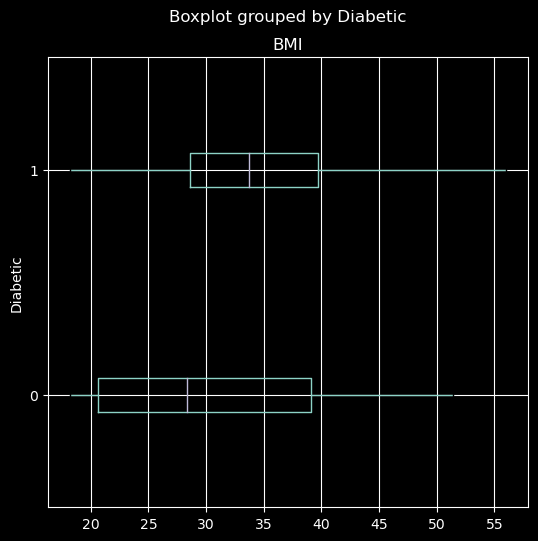

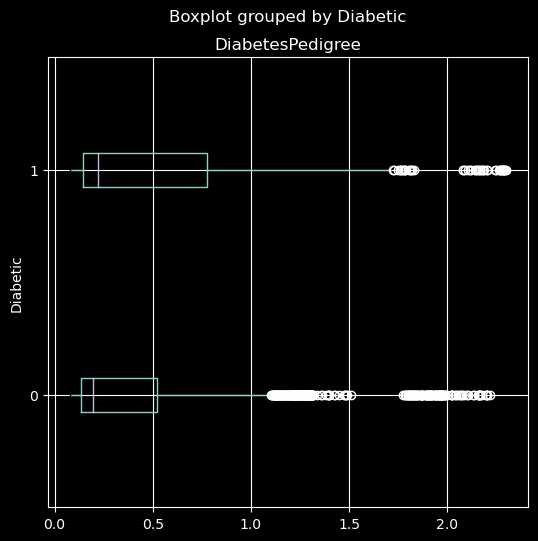

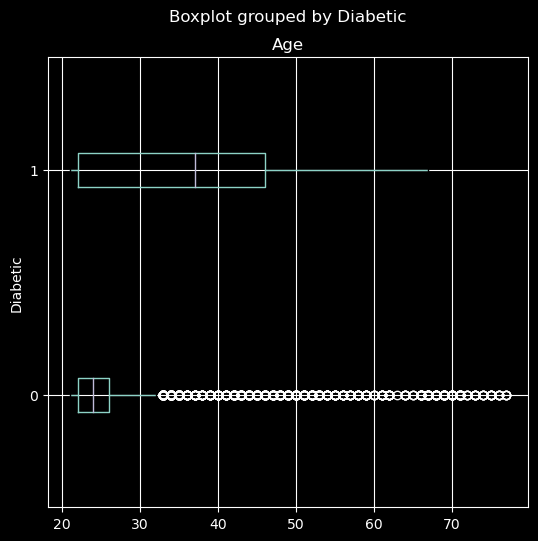

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use("dark_background")
for col in features:
    diabetes.boxplot(column=col,by='Diabetic',figsize=(6,6),vert=False)
    plt.title(col)
    
plt.show()

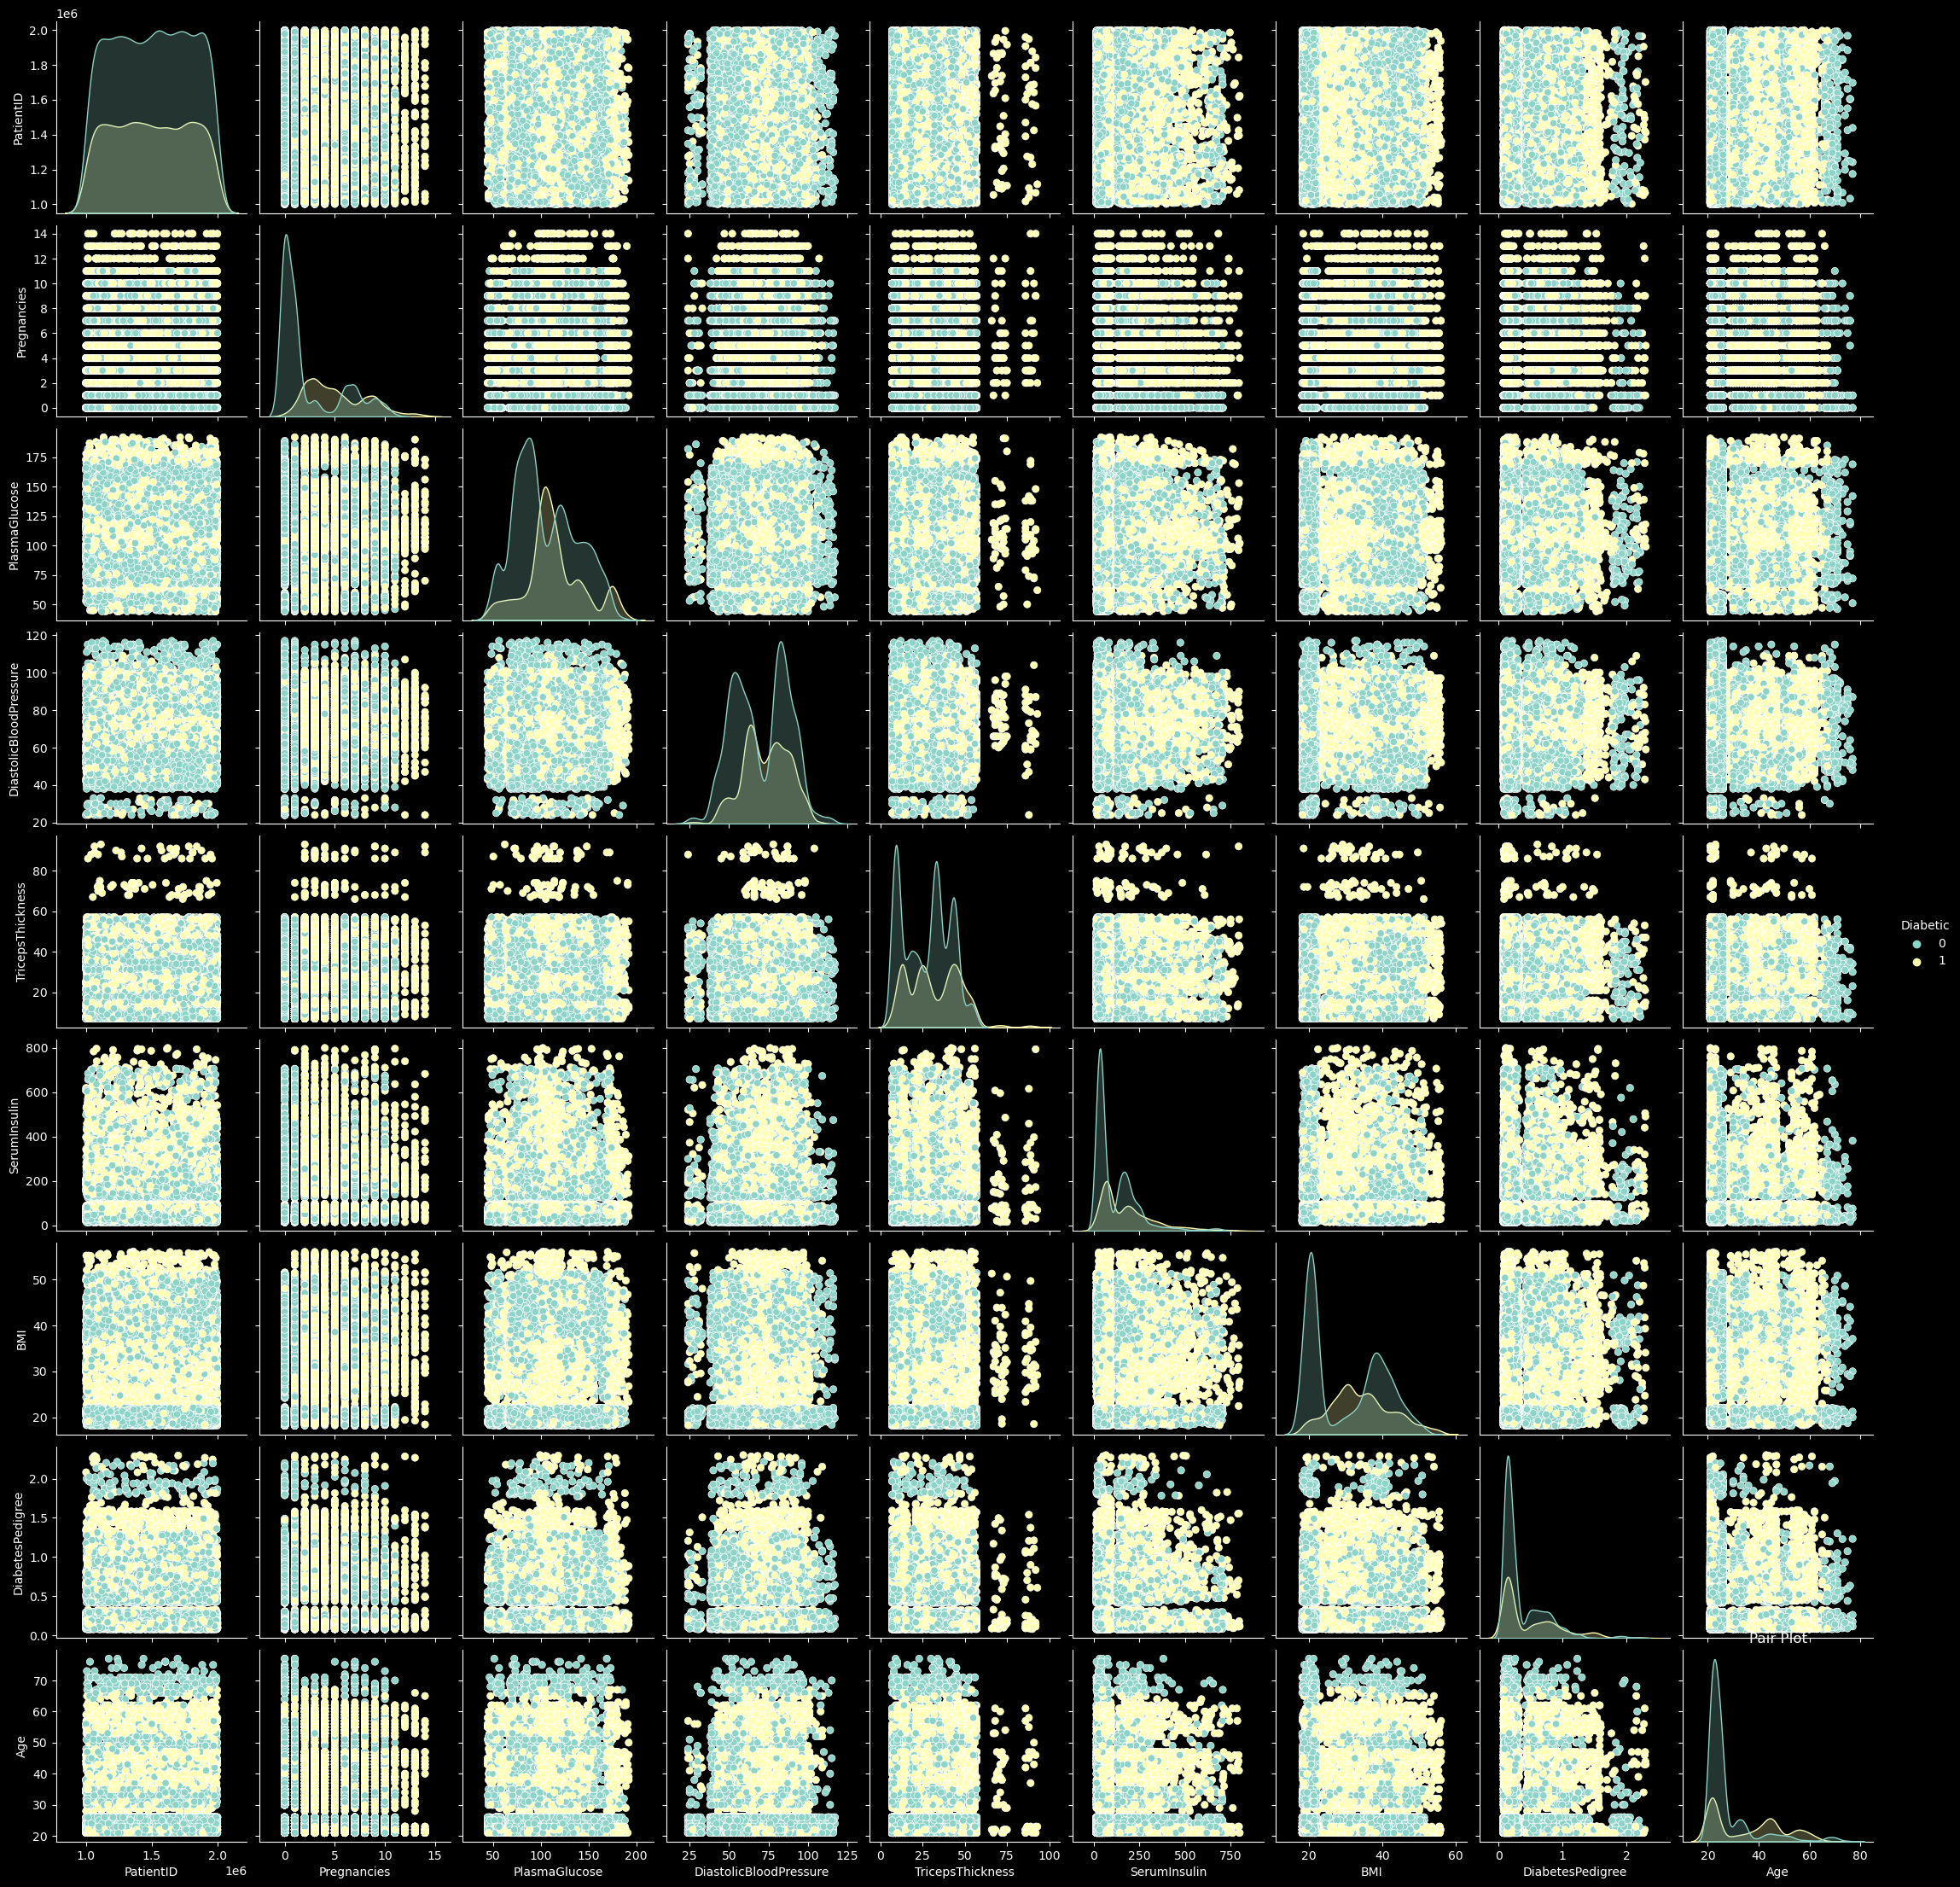

In [10]:
sns.pairplot(diabetes,hue='Diabetic')
plt.title('Pair Plot')
plt.show()

In [11]:
diabetes.isnull().sum()

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=0)

print(X_train.shape[0])
print(X_test.shape[0])

10500
4500


In [13]:
X_train['Age'].value_counts('%')*100

21    16.980952
22    16.771429
23    13.342857
24     6.561905
25     6.552381
26     6.504762
45     2.152381
44     1.866667
47     1.742857
43     1.704762
46     1.657143
34     1.580952
30     1.523810
35     1.514286
32     1.466667
33     1.409524
31     1.314286
53     0.961905
42     0.923810
55     0.876190
56     0.800000
38     0.800000
39     0.723810
54     0.714286
57     0.704762
40     0.647619
41     0.628571
60     0.514286
37     0.485714
61     0.485714
36     0.476190
59     0.466667
58     0.438095
52     0.438095
62     0.380952
50     0.361905
29     0.361905
49     0.352381
67     0.352381
51     0.342857
48     0.304762
71     0.276190
69     0.257143
66     0.247619
68     0.209524
70     0.190476
28     0.161905
65     0.142857
63     0.076190
64     0.066667
73     0.057143
75     0.047619
72     0.028571
77     0.019048
74     0.019048
76     0.009524
Name: Age, dtype: float64

In [14]:
X_test['Age'].value_counts('%')*100

21    17.177778
22    16.111111
23    13.088889
26     7.066667
25     6.733333
24     6.155556
46     2.133333
45     1.977778
43     1.933333
44     1.688889
47     1.688889
35     1.622222
32     1.600000
34     1.555556
31     1.288889
30     1.133333
33     1.088889
53     0.955556
56     0.844444
40     0.844444
42     0.822222
54     0.822222
41     0.800000
55     0.800000
38     0.777778
57     0.711111
61     0.600000
60     0.577778
59     0.577778
58     0.555556
39     0.555556
37     0.511111
62     0.511111
50     0.444444
49     0.400000
36     0.377778
52     0.377778
48     0.333333
66     0.311111
51     0.311111
71     0.288889
28     0.266667
29     0.266667
69     0.266667
67     0.266667
70     0.200000
68     0.111111
76     0.088889
64     0.088889
74     0.066667
65     0.066667
75     0.044444
77     0.044444
63     0.022222
72     0.022222
73     0.022222
Name: Age, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.30,stratify=X['Age'],random_state=0)
print(X_train.shape[0])
print(X_test.shape[0])

10500
4500


In [16]:
X_test['Age'].value_counts('%')*100

21    17.044444
22    16.577778
23    13.266667
26     6.666667
25     6.600000
24     6.444444
45     2.088889
44     1.822222
46     1.800000
43     1.777778
47     1.733333
34     1.577778
35     1.555556
32     1.511111
30     1.400000
31     1.311111
33     1.311111
53     0.955556
42     0.888889
55     0.844444
56     0.822222
38     0.800000
54     0.755556
57     0.711111
40     0.711111
41     0.688889
39     0.666667
60     0.533333
61     0.511111
59     0.511111
37     0.488889
58     0.466667
36     0.444444
62     0.422222
52     0.422222
50     0.377778
49     0.355556
29     0.333333
67     0.333333
51     0.333333
48     0.311111
71     0.288889
69     0.266667
66     0.266667
28     0.200000
70     0.200000
68     0.177778
65     0.111111
64     0.066667
63     0.066667
75     0.044444
73     0.044444
77     0.022222
74     0.022222
76     0.022222
72     0.022222
Name: Age, dtype: float64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,stratify=y,random_state=0)
print(X_train.shape[0])
print(X_test.shape[0])

10500
4500


In [18]:
import numpy as np

unique_elements_train, counts_elements_train = np.unique(y_train,return_counts=True)
percentages_train = (counts_elements_train/y_train.size)*100

In [19]:
print(unique_elements_train)
print(counts_elements_train)
print(percentages_train)
print(y_train.shape)

[0 1]
[7000 3500]
[66.66666667 33.33333333]
(10500,)


In [20]:
unique_elements_test, counts_elements_test = np.unique(y_test,return_counts=True)
percentages_test=(counts_elements_test/y_test.size)*100
print(unique_elements_test)
print(counts_elements_test)
print(percentages_test)
print(y_test.shape)

[0 1]
[3000 1500]
[66.66666667 33.33333333]
(4500,)


In [23]:
from sklearn.linear_model import LogisticRegression

In [25]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Work\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
predictions = model.predict(X_test)
print(predictions)

[0 1 1 ... 1 0 0]


In [27]:
print(y_test.values)

[0 1 0 ... 0 0 0]


In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,predictions)
print(cm)

[[2631  369]
 [ 570  930]]


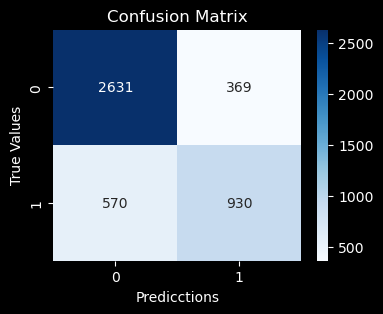

In [29]:
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicctions')
plt.ylabel('True Values')
plt.show()

In [33]:
from sklearn.metrics import accuracy_score, classification_report

print('Accurracy: ', accuracy_score(y_test, predictions))
print('Classification Report: \n', classification_report(y_test, predictions))




Accurracy:  0.7913333333333333
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85      3000
           1       0.72      0.62      0.66      1500

    accuracy                           0.79      4500
   macro avg       0.77      0.75      0.76      4500
weighted avg       0.79      0.79      0.79      4500



In [34]:
print(classification_report(y_test,predictions,target_names=["No diabetes", "Diabetes"]))

              precision    recall  f1-score   support

 No diabetes       0.82      0.88      0.85      3000
    Diabetes       0.72      0.62      0.66      1500

    accuracy                           0.79      4500
   macro avg       0.77      0.75      0.76      4500
weighted avg       0.79      0.79      0.79      4500



In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Overall Precision: ", precision_score(y_test, predictions, average=None))
print("Overall Recall: ", recall_score(y_test, predictions, average=None))
print("Overall F1: ",f1_score(y_test, predictions, average=None))

Overall Precision:  [0.82193065 0.71593533]
Overall Recall:  [0.877 0.62 ]
Overall F1:  [0.84857281 0.66452304]


In [36]:
y_scores = model.predict_proba(X_test)
pd.DataFrame({'proba_0':y_scores[:,0],'proba_1':y_scores[:,1],'Categories':predictions}).head(15)

proba_0   proba_1  Categories
0   0.954467  0.045533           0
1   0.224066  0.775934           1
2   0.211567  0.788433           1
3   0.905580  0.094420           0
4   0.895259  0.104741           0
5   0.707572  0.292428           0
6   0.583197  0.416803           0
7   0.179885  0.820115           1
8   0.948507  0.051493           0
9   0.222347  0.777653           1
10  0.773727  0.226273           0
11  0.972494  0.027506           0
12  0.969092  0.030908           0
13  0.133477  0.866523           1
14  0.808865  0.191135           0

In [43]:
from sklearn.metrics import roc_curve, confusion_matrix


fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

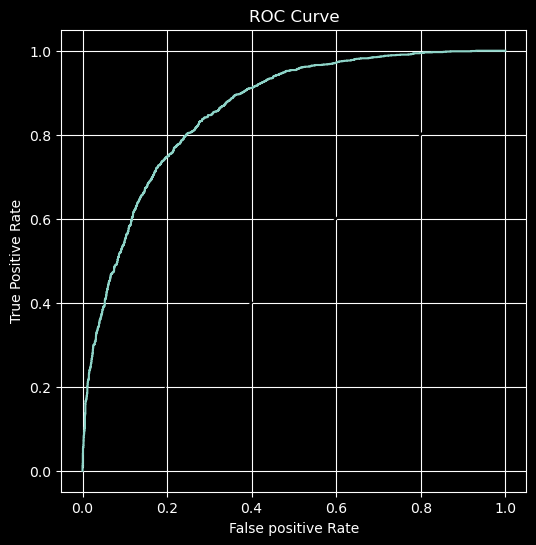

In [44]:
fig = plt.figure(figsize=(6,6))
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()
plt.show()

In [46]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.8586295555555555


In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np

In [48]:
numeric_features = [0,1,2,3,4,5,6]
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = [7]
categorical_transformer = Pipeline(steps=[('OneHot',OneHotEncoder(handle_unknown='ignore'))])

In [49]:
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [62]:
pipeline=Pipeline(steps=[('preprocessor',preprocessor),
                         ('logregressor',LogisticRegression(solver='lbfgs', max_iter=500))])

model=pipeline.fit(X_train, (y_train))
print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('OneHot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor', LogisticRegression(max_iter=500))])


In [63]:
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('OneHot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor', LogisticRegression(max_iter=500))])

### Logistic Regression 

    - Binary Case

    

$ P(y_i = 1|X_i) $

$ {\hat{p}}(X_i) = expit({X_i}w+{w_o}) = \frac{1}{1 + exp({-X_i}w-w_0)} $

Regularization Term r(w)

$ \min\limits_{m}\frac{1}{S}\sum\limits_{i=1}^{n}s_i(-y_i\log(\hat{p}(X_i)) - (1 - y_i)\log(1 - \hat{p}(X_i))) + \frac{r(w)}{SC} $

Where $s_i$ corresponds to the weights assigned by the user to a specific training sample (the vector 
 is formed by element-wise multiplication of the class weights and sample weights), and the sum

$ S = \sum_{i=1}^n S_i $

Penalty $ r(w) $ 

NONE        0 

$ \ell_1    ||w||_1$ 

$ \ell_2    \frac{1}{2}||w||_2^2=\frac{1}{2}w^tw $

ElasticNet  $\frac{1-p}{2}w^Tw+p||w||1 $


In [64]:
predictions =model.predict(X_test)
y_scores=model.predict_proba(X_test)

cm=confusion_matrix(y_test,predictions)



In [65]:
cm

array([[2693,  307],
       [ 383, 1117]], dtype=int64)

In [69]:
precision_score(y_test,predictions)

0.7844101123595506

In [70]:
accuracy_score(y_test,predictions)

0.8466666666666667

In [71]:
recall_score(y_test,predictions)

0.7446666666666667

In [72]:
f1_score(y_test,predictions)

0.7640218878248974

In [73]:
auc=roc_auc_score(y_test,y_scores[:,1])
print(str(auc))

0.9225477777777777


In [75]:
fpr,tpr, thresholds = roc_curve(y_test, y_scores[:,1])

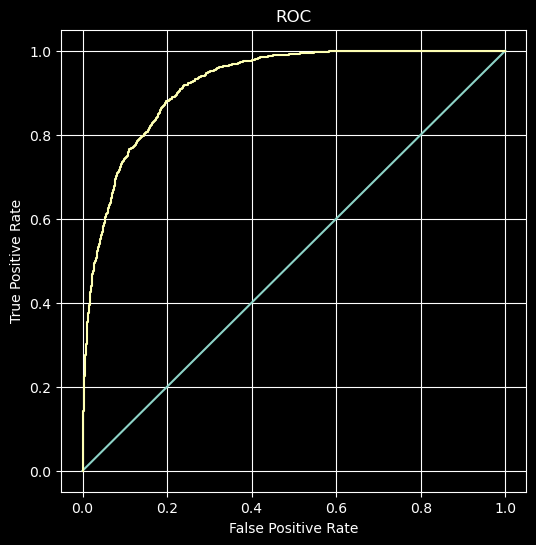

In [77]:
fig = plt.figure(figsize=(6,6))

plt.plot([0,1],[0,1])

plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.grid()
plt.show()

In [78]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

model=DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred=model.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)

In [79]:
print(accuracy)

0.9053333333333333


In [80]:
print(y_pred)

[0 1 0 ... 1 0 0]


In [83]:
print(y_test.values)

[0 1 0 ... 0 0 0]


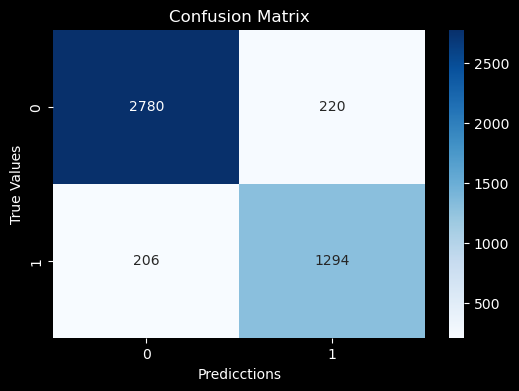

In [85]:
cm_pred=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm_pred, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicctions')
plt.ylabel('True Values')
plt.show()

In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3000
           1       0.85      0.86      0.86      1500

    accuracy                           0.91      4500
   macro avg       0.89      0.89      0.89      4500
weighted avg       0.91      0.91      0.91      4500



[[2780  220]
 [ 206 1294]]
0.9053333333333333
0.8546895640686922
0.8626666666666667
0.8586595885865959
0.8946666666666667


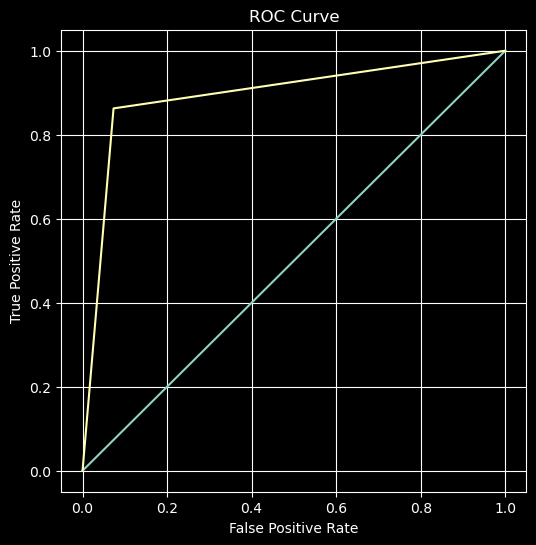

In [90]:
predictions_pred=model.predict(X_test)
y_scores=model.predict_proba(X_test)

cm_pred=confusion_matrix(y_test,predictions_pred)
print(cm_pred)
print(accuracy_score(y_test,predictions_pred))
print(precision_score(y_test,predictions_pred))
print(recall_score(y_test,predictions_pred))
print(f1_score(y_test,predictions_pred))
auc_pred=roc_auc_score(y_test,y_scores[:,1])
print(str(auc_pred))


fpr, tpr, thresholds=roc_curve(y_test,y_scores[:,1])
fig_pred=plt.figure(figsize=(6,6))
plt.plot([0,1],[0,1])

plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()
plt.show()